In [73]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
from pathlib import Path
import json
from dictor import dictor
from pprint import pprint

# specify the folder path
folder_path = Path("local_replay_jsons/")

# get a list of all files in the folder
file_list = folder_path.glob("*.json")

# sort the list based on last modified time
file_list = sorted(file_list, key=lambda x: x.stat().st_mtime)

# print the list of files in order of last modified time
for file in file_list:
    print(file.name)

file_to_view = file_list[-1]
print(f"\nWill be viewing:\n\t{file_to_view}")

with open(file_to_view, "r") as f:
    full_replay = json.load(f)

seed = dictor(full_replay, "default_seed")
my_team = "player_0"
print(f"seed = {seed}\nmy team = {my_team}")

replay_1.json
replay_2.json
replay_3.json
replay_4.json
replay_5.json
replay_6.json
replay_7.json
replay_8.json
replay_9.json
replay_10.json
replay_11.json
replay_12.json
replay_13.json
replay_14.json
replay_15.json
replay_16.json
replay_17.json
replay_18.json
replay_19.json
replay_20.json
replay_21.json
replay_22.json
replay_23.json
replay_24.json
replay_25.json
replay_26.json
replay_27.json
replay_28.json
replay_29.json
replay_30.json
replay_31.json
replay_32.json
replay_33.json
replay_34.json
replay_35.json
replay_36.json
replay_37.json
replay_38.json
replay_39.json
replay_40.json
replay_41.json
replay_42.json
replay_43.json
replay_44.json
replay_45.json
replay_46.json

Will be viewing:
	local_replay_jsons\replay_46.json
seed = 45343
my team = player_0


In [77]:
import logging
from agent import Agent
from util import show_env, MyReplayEnv
from config import update_logging_level

In [78]:
myenv = MyReplayEnv(seed=seed, Agent=Agent, replay_json=full_replay)

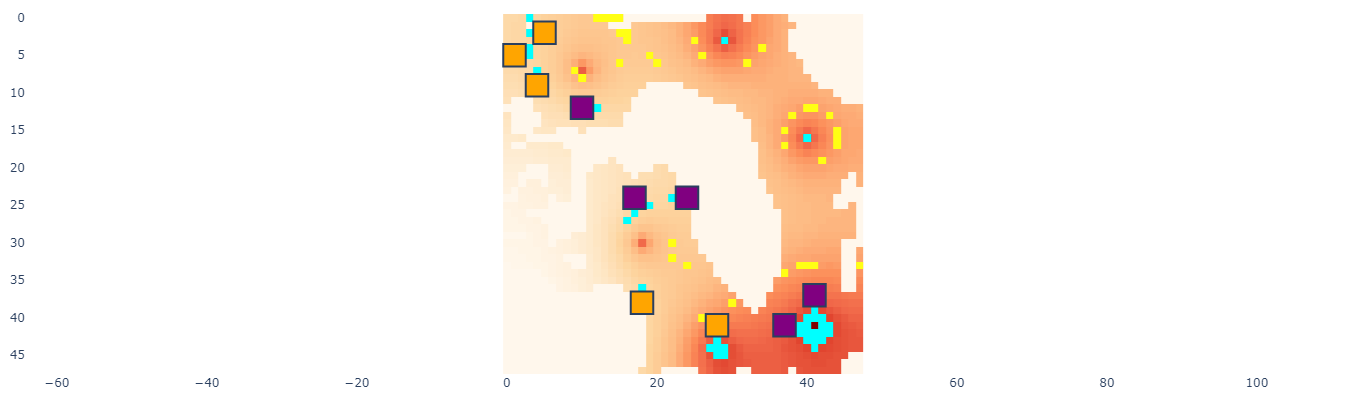

In [90]:
# Clear logfile
with open("logfile.log", "w") as f:
    pass
myenv.run_early_setup()
# myenv.show()

  0%|          | 0/8 [00:00<?, ?it/s]

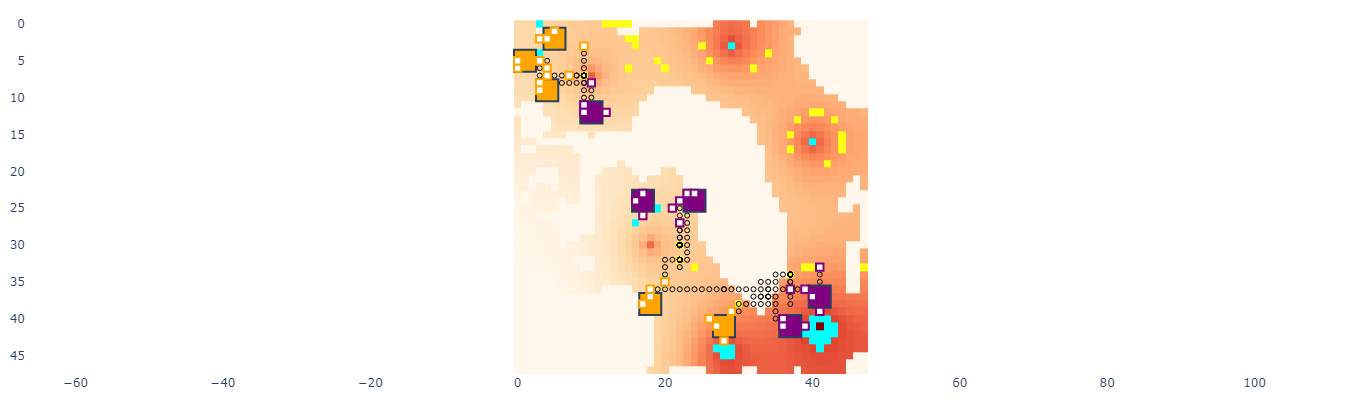

In [91]:
update_logging_level(logging.WARNING)
myenv.run_to_step(8)
update_logging_level(logging.DEBUG)
# myenv.run_to_step(8)
# myenv.undo()
myenv.step()
myenv.show()

In [61]:
import util

agent = myenv.agent
unit = agent.master.units.friendly.all["unit_21"]
unit.start_of_turn_pos

(10, 8)

In [24]:
rec = agent.mining_planner.recommend(unit, resource_type=util.ORE, unit_must_move=False)
rec.resource_pos

checking (22, 30),  cm there is -1.0
checking (22, 32),  cm there is -1.0
checking (24, 33),  cm there is 16.126581984


(24, 33)

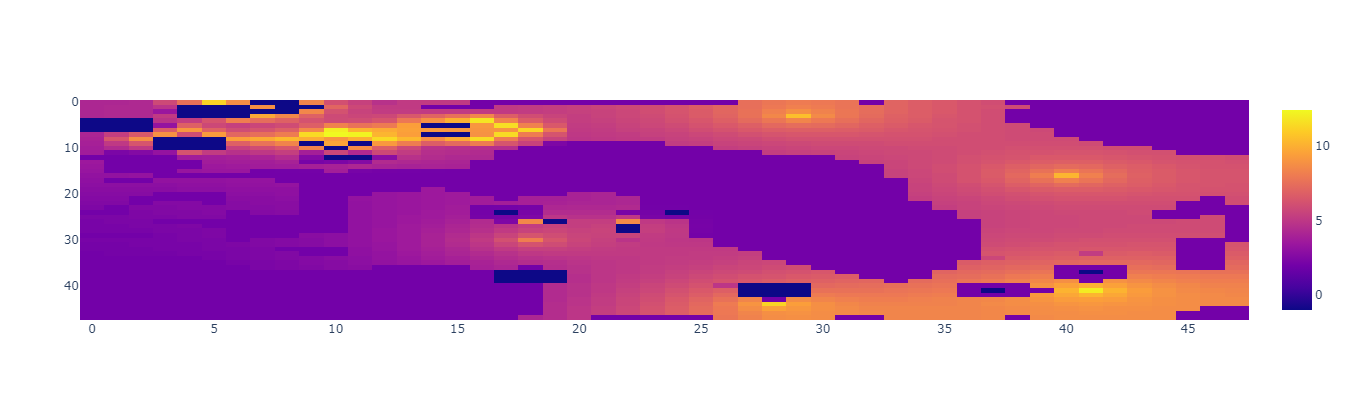

In [68]:
cm = agent.master.pathfinder.generate_costmap(
    unit, friendly_light=True, enemy_light=True, override_step=5
)
util.show_map_array(cm)

## Run one step at a time

In [7]:
import numpy as np
from unit_manager import FriendlyUnitManager
from unit_action_planner import UnitPaths
import util

In [11]:
agent = myenv.agent
unit = agent.master.units.friendly.all["unit_12"]

# old_acts = unit.action_queue.copy()
# unit.action_queue = []
# unit.pos = (6, 17)

[autoreload of mining_planner failed: Traceback (most recent call last):
  File "C:\Users\Child\.conda\envs\lux2022\lib\site-packages\IPython\extensions\autoreload.py", line 261, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\Child\.conda\envs\lux2022\lib\site-packages\IPython\extensions\autoreload.py", line 484, in superreload
    update_generic(old_obj, new_obj)
  File "C:\Users\Child\.conda\envs\lux2022\lib\site-packages\IPython\extensions\autoreload.py", line 381, in update_generic
    update(a, b)
  File "C:\Users\Child\.conda\envs\lux2022\lib\site-packages\IPython\extensions\autoreload.py", line 333, in update_class
    if update_generic(old_obj, new_obj):
  File "C:\Users\Child\.conda\envs\lux2022\lib\site-packages\IPython\extensions\autoreload.py", line 381, in update_generic
    update(a, b)
  File "C:\Users\Child\.conda\envs\lux2022\lib\site-packages\IPython\extensions\autoreload.py", line 293, in update_function
    setattr(old, name, getattr(new, nam

In [15]:
path = unit.actions_to_path(unit.action_queue)
path

array([[ 8, 11],
       [ 8, 12],
       [ 8, 13],
       [ 8, 14],
       [ 8, 15],
       [ 7, 15],
       [ 7, 16],
       [ 6, 16],
       [ 6, 17],
       [ 6, 18],
       [ 6, 18],
       [ 6, 18],
       [ 6, 18],
       [ 6, 18],
       [ 6, 18],
       [ 6, 18],
       [ 6, 18],
       [ 6, 18],
       [ 6, 18],
       [ 6, 18]])

In [24]:
np.array([1])[1:]

array([], dtype=int32)

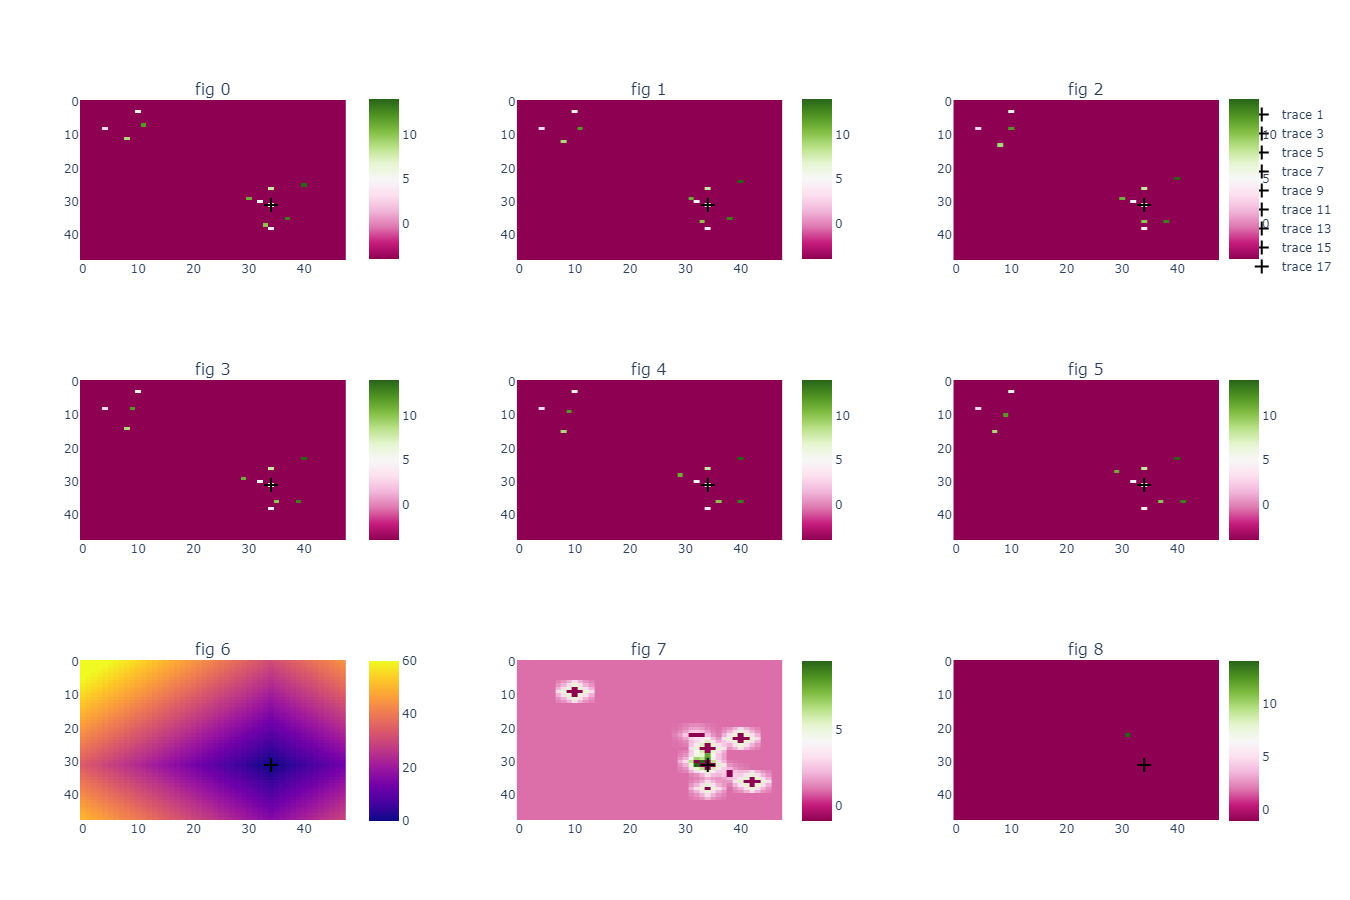

In [38]:
import plotly.graph_objects as go

paths = UnitPaths.from_units(
    friendly=agent.master.units.friendly.all,
    enemy=agent.master.units.enemy.all,
    friendly_valid_move_map=agent.master.maps.valid_friendly_move,
    enemy_valid_move_map=agent.master.maps.valid_enemy_move,
    max_step=60,
)
# paths = UnitPaths.from_units(
#     friendly=agent.master.units.friendly.light,
#     enemy={},
#     friendly_valid_move_map=agent.master.maps.valid_friendly_move,
#     enemy_valid_move_map=agent.master.maps.valid_enemy_move,
#     max_step=10,
# )


start_step = 0
# pos = (8, 11)
pos = (34, 31)

figs = []
for i in range(6):
    fig = util.show_map_array(paths.all[i])
    figs.append(fig)

# Distance kernel
kernel = util.manhattan_kernel(paths.max_step - start_step)
kernel[kernel > paths.max_step] = paths.max_step
index_array = util.pad_and_crop(
    kernel,
    paths.friendly_valid_move_map,
    pos[0],
    pos[1],
    fill_value=paths.max_step - start_step,
)
figs.append(util.show_map_array(index_array))

# Calulated paths
cm = paths.to_costmap(
    pos=pos,
    start_step=start_step,
    # Add id_num here to exclude from costmap
    exclude_id_nums=[],
    friendly_light=True,
    friendly_heavy=True,
    enemy_light=True,
    enemy_heavy=True,
    collision_cost_value=-1,
    nearby_start_cost=1,
    step_dropoff_multiplier=0.92,
    true_intercept=False,
)
figs.append(util.show_map_array(cm))

collision_unit_ids_dict = paths.calculate_likely_unit_collisions(
    pos=pos,
    start_step=start_step,
    exclude_id_nums=[],
    friendly_light=True,
    friendly_heavy=True,
    enemy_light=True,
    enemy_heavy=True,
)
friendly_light_collision_ids = collision_unit_ids_dict["friendly_light"]
figs.append(util.show_map_array(friendly_light_collision_ids))


for fig in figs:
    fig.add_trace(
        go.Scatter(
            x=[pos[0]],
            y=[pos[1]],
            mode="markers",
            marker=dict(
                symbol="cross-thin", size=10, line=dict(color="black", width=2)
            ),
        )
    )

fig = util.figures_to_subplots(figs).update_yaxes(autorange="reversed")
fig.update_xaxes(matches="x")
fig.update_yaxes(matches="y")
fig.show()

In [44]:
arr = np.array([[]])
len(arr)

1

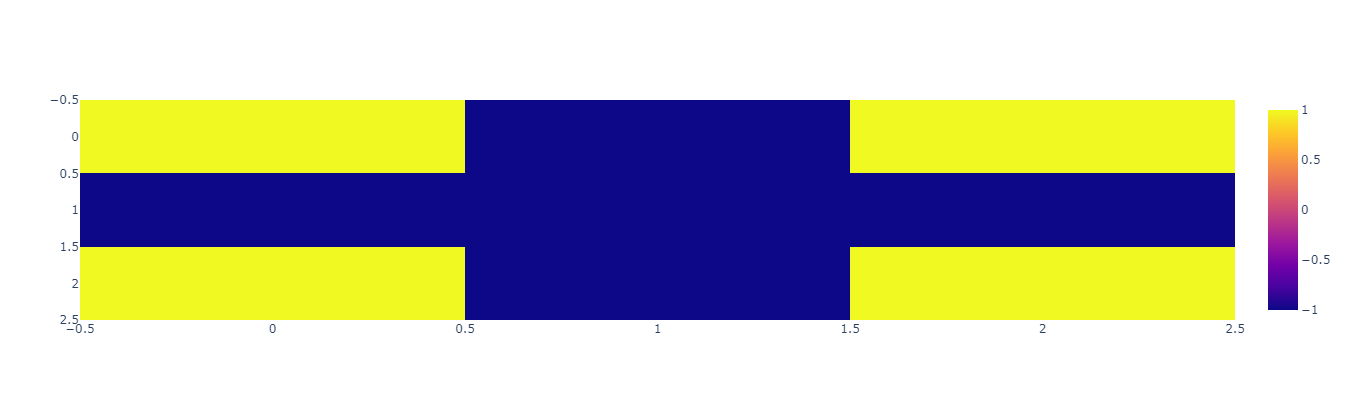

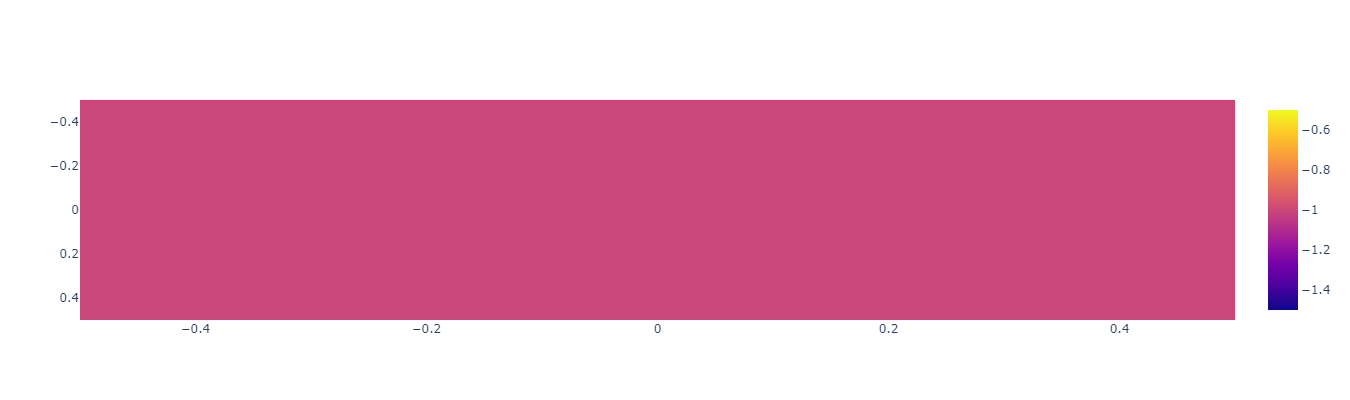

In [181]:
for ker in [paths._enemy_collision_kernel, paths._friendly_collision_kernel]:
    util.show_map_array(ker).show()

In [163]:
arr = np.zeros((6, 6))
arr[2, 4] = 1

ker = paths._enemy_blur_kernel()
ker
util.convolve_array_kernel(arr, ker)

array([[ 0.    ,  0.125 ,  0.25  ,  0.5   ,  1.    ,  0.5   ],
       [ 0.    ,  0.25  ,  0.5   ,  1.    , -2.    ,  1.    ],
       [ 0.    ,  0.5   ,  1.    , -2.    , -4.    , -2.    ],
       [ 0.    ,  0.25  ,  0.5   ,  1.    , -2.    ,  1.    ],
       [ 0.    ,  0.125 ,  0.25  ,  0.5   ,  1.    ,  0.5   ],
       [ 0.    ,  0.0625,  0.125 ,  0.25  ,  0.5   ,  0.25  ]])

In [149]:
paths._get_teams_and_utypes(True, False, False, True)


(['friendly', 'enemy'], ['light', 'heavy'])

In [150]:
paths.calculate_likely_unit_collisions(
    pos=pos,
    start_step=start_step,
    # Add id_num here to exclude from costmap
    exclude_id_nums=[],
    friendly_light=True,
    friendly_heavy=True,
    enemy_light=True,
    enemy_heavy=True,
).keys()

friendly_light
friendly_heavy
enemy_light
enemy_heavy


odict_keys(['friendly_light', 'friendly_heavy', 'enemy_light', 'enemy_heavy'])

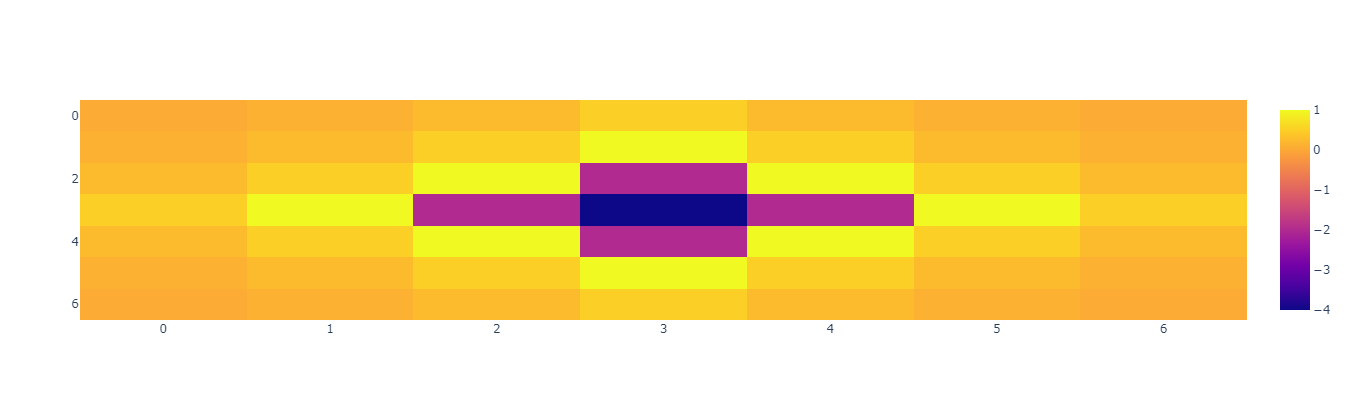

In [132]:
# adj_kernel = (util.manhattan_kernel(1) <= 1).astype(int) * -1
# adj_kernel[adj_kernel == 0] = 1
# # blur_size = max(1, min(5, (start_step + i) // 2))
# blur_size = 3
# blur_kernel = 5 * 0.5 ** util.manhattan_kernel(blur_size)
# blur_kernel = (
#     util.pad_and_crop(adj_kernel, blur_kernel, blur_size, blur_size, fill_value=1)
#     * blur_kernel
# )

blur_kernel = paths._enemy_blur_kernel()
util.show_map_array(blur_kernel)

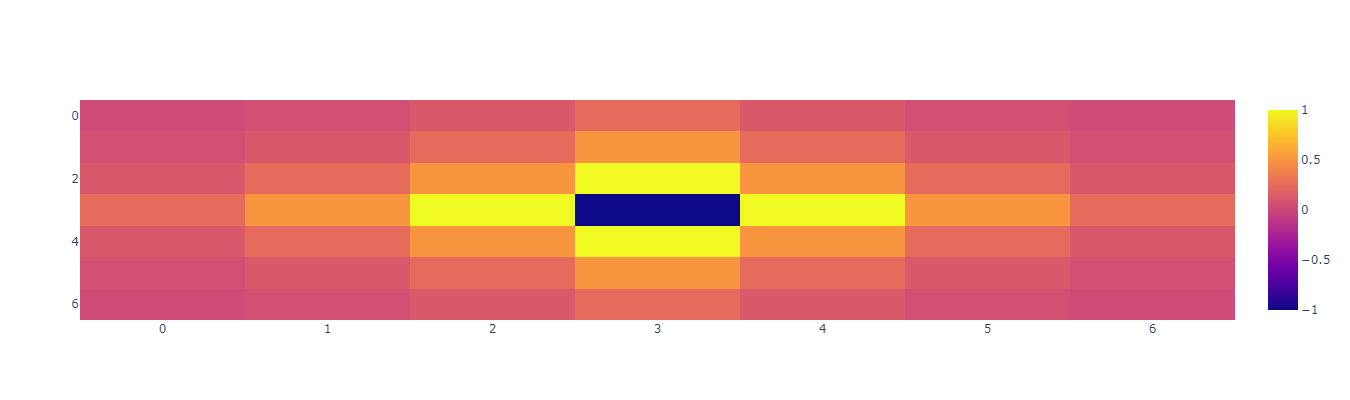

In [130]:
blur_size = 3
blur_kernel = 3 * 0.5 ** util.manhattan_kernel(blur_size)
blur_kernel[blur_size, blur_size] = -1

blur_kernel = paths._friendly_blur_kernel()
util.show_map_array(blur_kernel)

In [216]:
%%timeit
# Calulated paths
cm = paths.to_costmap(
    pos=pos,
    start_step=start_step,
    exclude_id_nums=[],
    friendly_light=True,
    friendly_heavy=True,
    enemy_light=True,
    enemy_heavy=True,
    collision_cost_value=-1,
    nearby_start_cost=5,
    nearby_dropoff_multiplier=0.7,
)

1.76 ms ± 30.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [217]:
%%timeit
collision_unit_ids = paths.calculate_likely_unit_collisions(
    pos=pos,
    start_step=start_step,
    exclude_id_nums=[],
    friendly_light=True,
    friendly_heavy=True,
    enemy_light=True,
    enemy_heavy=True,
)

329 µs ± 2.68 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


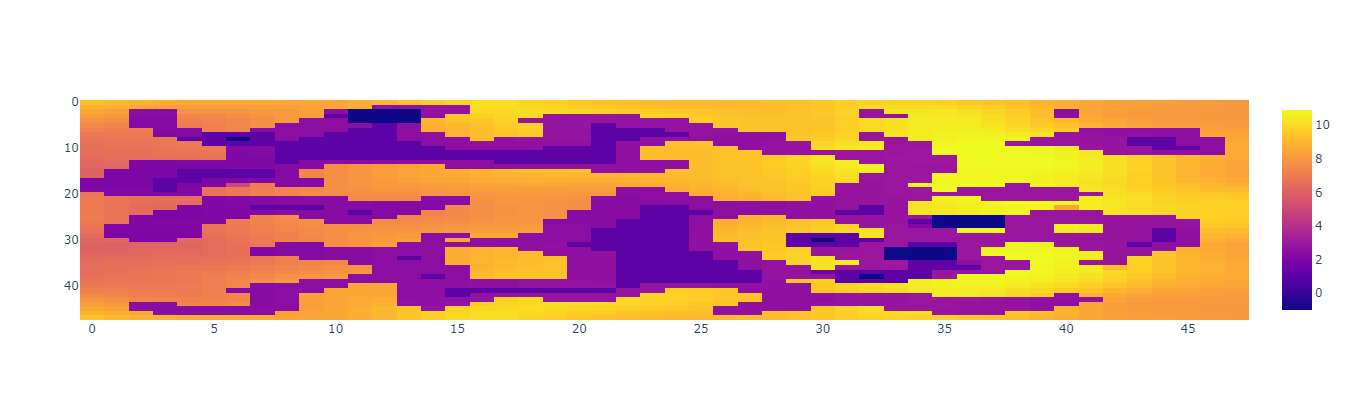

In [178]:
util.show_map_array(agent.master.pathfinder.full_costmap).update_layout(height=400, width=500)